In [1]:
#Mount my google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


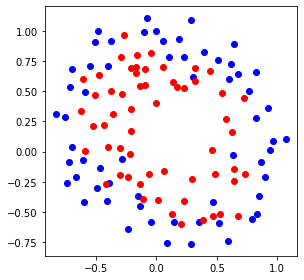

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy

with open('drive/My Drive/machine_learning_data/assignment07/data-nonlinear.txt', newline='') as file:
  data= np.genfromtxt(file, delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
m = len(x)

x0 = x[label == 0]
y0 = y[label == 0]

x1 = x[label == 1]
y1 = y[label == 1]

plt.figure()
plt.scatter(x0, y0, c='b')
plt.scatter(x1, y1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [3]:
#initialize Train Parameter Setting the Theta number
theta = []

for i in range(10):
  tempTheta = []

  for j in range(10):
    tempTheta.append(j/10)
  theta.append(tempTheta)
theta = np.array(theta, dtype='float64')

print(theta)

[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]]


In [0]:
#Define linear function & cost function & derivative function of cost function
def createMatrix(x, y):
  result = []
  for i in range(m):
    tempMatrix = []
    for j in range(len(theta)):
      for k in range(len(theta[j])):
        tempMatrix.append((x[i]**j) * (y[i]**k))
    result.append(tempMatrix)
  
  return np.array(result,dtype='float64')

In [0]:
inputMatrix = createMatrix(x, y)

In [0]:
thetaMatrix = []
for i in range(len(theta)):
  for j in range(len(theta[i])):
    thetaMatrix.append(theta[i][j])


thetaMatrixOverfit = np.array(thetaMatrix)
thetaMatrixRight = np.array(thetaMatrix)
thetaMatrixUnderfit = np.array(thetaMatrix)

In [0]:
#Define linear function & cost function & derivative function of cost function
def zFunc(thetaMatrix, inputMatrix):
  return np.matmul(thetaMatrix, inputMatrix.T)

def sigmaFunc(zFuncMatrix):
  return np.array(1 / (1 + np.exp(-1 * zFuncMatrix)),dtype='float64')

def jFunc(sigmaFuncMatrix, thetaMatrix, label, regularize):
  return 1/m * np.sum(((-1 * label) * np.log(sigmaFuncMatrix)) - ((1-label) * np.log(1-sigmaFuncMatrix))) + (regularize * np.sum(thetaMatrix**2))

def jPrimeTheta(sigmaFuncMatrix, label):
  return np.array(1 / m * np.matmul(sigmaFuncMatrix-label, inputMatrix),dtype='float64')

In [0]:
# Define update Function
learningRate = 0.7

def updateTheta(thetaMatrix, inputMatrix, label, regularizeLamda):
  tempUpdateTheta = jPrimeTheta(sigmaFunc(zFunc(thetaMatrix, inputMatrix)), label)

  updateTheta = thetaMatrix * (1 - learningRate * regularizeLamda) - learningRate * tempUpdateTheta
  return np.array(updateTheta,dtype='float64')

In [9]:
# Under Fitting Learning
trainingError_Underfit = []
accuracy_Underfit = []
counter_Underfit = 0
underfitLamda = 0.01

while(1):
  counter_Underfit += 1
  tempThetaMatrix = thetaMatrixUnderfit
  # Underfitting
  thetaMatrixUnderfit = updateTheta(thetaMatrixUnderfit, inputMatrix, label, underfitLamda)


  accList = ((sigmaFunc(zFunc(thetaMatrixUnderfit, inputMatrix)) >= 0.5) == label).tolist()
  tempAccuracy = accList.count(True)

  accuracy_Underfit.append(tempAccuracy)
  # if (counter_Underfit % 1000) == 0:
  print('Accuracy : ' + str(tempAccuracy))
  print('Training Error : ' + str(jFunc(sigmaFunc(zFunc(thetaMatrixUnderfit, inputMatrix)), thetaMatrixUnderfit, label, underfitLamda)))

  break_condition = 0
  for i in range(len(thetaMatrix)):
    if round(tempThetaMatrix[i], 8) == round(thetaMatrixUnderfit[i], 8):
      break_condition = break_condition + 1
  if break_condition == 100:
    print('Finish the Learning')
    break

Accuracy : 58
Training Error : 1.2952794637194835
Accuracy : 54
Training Error : 1.2328547248705235
Accuracy : 51
Training Error : 1.1801248018295922
Accuracy : 48
Training Error : 1.1352044324807382
Accuracy : 48
Training Error : 1.0966309671923642
Accuracy : 49
Training Error : 1.0632460322995807
Accuracy : 48
Training Error : 1.03413530506945
Accuracy : 47
Training Error : 1.008589406780258
Accuracy : 48
Training Error : 0.9860573993353519
Accuracy : 49
Training Error : 0.966092863476317
Accuracy : 51
Training Error : 0.9483108470893871
Accuracy : 53
Training Error : 0.9323692224302824
Accuracy : 56
Training Error : 0.9179694597714219
Accuracy : 57
Training Error : 0.904861655090176
Accuracy : 63
Training Error : 0.8928441395617157
Accuracy : 62
Training Error : 0.8817572756952125
Accuracy : 63
Training Error : 0.8714748776787599
Accuracy : 66
Training Error : 0.8618960455775829
Accuracy : 66
Training Error : 0.8529385906400364
Accuracy : 68
Training Error : 0.8445341872546636
Accur

In [10]:
# Right Fitting Learning
trainingError_Right = []
accuracy_Right = []
counter_Right = 0
rightLamda = 0.0001

while(1):
  counter_Right += 1
  tempThetaMatrix = thetaMatrixRight

  thetaMatrixRight = updateTheta(thetaMatrixRight, inputMatrix, label, rightLamda)


  accList = ((sigmaFunc(zFunc(thetaMatrixRight, inputMatrix)) >= 0.5) == label).tolist()
  tempAccuracy = accList.count(True)

  accuracy_Right.append(tempAccuracy)
  if (counter_Right % 1000) == 0:
    print('Accuracy : ' + str(tempAccuracy))
    print('Training Error : ' + str(jFunc(sigmaFunc(zFunc(thetaMatrixRight, inputMatrix)), thetaMatrixRight, label, rightLamda)))
    print('Counter : ' + str(counter_Right))

  break_condition = 0
  for i in range(len(thetaMatrix)):
    if round(tempThetaMatrix[i], 8) == round(thetaMatrixRight[i], 8):
      break_condition = break_condition + 1
  if break_condition == 100:
    print('Finish the Learning')
    break

Accuracy : 98
Training Error : 0.3587347761193867
Counter : 1000
Accuracy : 100
Training Error : 0.3498618292324381
Counter : 2000
Accuracy : 100
Training Error : 0.3474032450815574
Counter : 3000
Accuracy : 100
Training Error : 0.3463928653286209
Counter : 4000
Accuracy : 99
Training Error : 0.3459063676687239
Counter : 5000
Accuracy : 99
Training Error : 0.3456624519167266
Counter : 6000
Accuracy : 99
Training Error : 0.3455512350313047
Counter : 7000
Accuracy : 99
Training Error : 0.3455202289442125
Counter : 8000
Accuracy : 99
Training Error : 0.3455402597694152
Counter : 9000
Accuracy : 99
Training Error : 0.34559342271977034
Counter : 10000
Accuracy : 99
Training Error : 0.34566801787863227
Counter : 11000
Accuracy : 99
Training Error : 0.3457560801032434
Counter : 12000
Accuracy : 99
Training Error : 0.34585203785154645
Counter : 13000
Accuracy : 99
Training Error : 0.3459519281655733
Counter : 14000
Accuracy : 99
Training Error : 0.3460529101325997
Counter : 15000
Accuracy : 99

In [0]:
# Over Fitting Learning
trainingError_Overfit = []
accuracy_Overfit = []
counter_Overfit = 0
overfitLamda = 0.000001

while(1):
  counter_Overfit += 1
  tempThetaMatrix = thetaMatrixOverfit
  # Overfitting
  thetaMatrixOverfit = updateTheta(thetaMatrixOverfit, inputMatrix, label, overfitLamda)


  accList = ((sigmaFunc(zFunc(thetaMatrixOverfit, inputMatrix)) >= 0.5) == label).tolist()
  tempAccuracy = accList.count(True)

  accuracy_Overfit.append(tempAccuracy)
  if counter_Overfit % 1000 == 0:
    print('Accuracy : ' + str(tempAccuracy))
    print('Training Error : ' + str(jFunc(sigmaFunc(zFunc(thetaMatrixOverfit, inputMatrix)), thetaMatrixOverfit, label, overfitLamda)))
    print('Counter : ' + str(counter_Overfit))


  break_condition = 0
  for i in range(len(thetaMatrix)):
    if round(tempThetaMatrix[i], 8) == round(thetaMatrixOverfit[i], 8):
      break_condition = break_condition + 1
  if break_condition == 100:
    print('Finish the Learning')
    break
  if counter_Overfit > 1000000:
    break

Accuracy : 99
Training Error : 0.3433755091422367
Counter : 1000
Accuracy : 99
Training Error : 0.3287800176453199
Counter : 2000
Accuracy : 100
Training Error : 0.3229032505696906
Counter : 3000
Accuracy : 99
Training Error : 0.3194796872119234
Counter : 4000
Accuracy : 99
Training Error : 0.3171008660203856
Counter : 5000
Accuracy : 99
Training Error : 0.31526722890632425
Counter : 6000
Accuracy : 99
Training Error : 0.31376390245751873
Counter : 7000
Accuracy : 99
Training Error : 0.3124832273094318
Counter : 8000
Accuracy : 99
Training Error : 0.31136396402660327
Counter : 9000
Accuracy : 99
Training Error : 0.3103678385959382
Counter : 10000
Accuracy : 99
Training Error : 0.3094692684311945
Counter : 11000
Accuracy : 99
Training Error : 0.3086502805084833
Counter : 12000
Accuracy : 99
Training Error : 0.3078977382126933
Counter : 13000
Accuracy : 99
Training Error : 0.30720171628762577
Counter : 14000
Accuracy : 99
Training Error : 0.30655449931240264
Counter : 15000
Accuracy : 99

In [0]:
print("\033[31m" + "Over Fit Lamda : " + str(overfitLamda))
print("\033[32m" + "Just Right Lamda : " + str(rightLamda))
print("\033[34m" + "Under Fit Lamda : " + str(underfitLamda) + "\033[0m")


In [0]:
#Visualize of Training Error
plt.figure(figsize=(30, 8))
plt.plot(range(len(trainingError_Overfit)), trainingError_Overfit, c='r')
plt.plot(range(len(trainingError_Right)), trainingError_Right, c='g')
plt.plot(range(len(trainingError_Underfit)), trainingError_Underfit, c='b')

plt.title('Training Error update')
plt.xlabel('Iter num')
plt.ylabel('Training Error Value')
plt.show()